Problem Statement:
* The dataset contains 6 years of information (weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis using Python.
Dataset: Market Risk Dataset
* Draw Stock Price Graph (Stock Price vs Time) for any 2 given stocks with inference

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
path=("/content/drive/MyDrive/Market+Risk+Dataset.csv")
df=pd.read_csv(path)

In [4]:
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [5]:
df.shape

(314, 11)

In [6]:
df.isnull().sum()

Date                   0
Infosys                0
Indian Hotel           0
Mahindra & Mahindra    0
Axis Bank              0
SAIL                   0
Shree Cement           0
Sun Pharma             0
Jindal Steel           0
Idea Vodafone          0
Jet Airways            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [14]:
df["Date"]=[pd.to_datetime(d) for d in df["Date"]]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian Hotel         314 non-null    int64         
 3   Mahindra & Mahindra  314 non-null    int64         
 4   Axis Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree Cement         314 non-null    int64         
 7   Sun Pharma           314 non-null    int64         
 8   Jindal Steel         314 non-null    int64         
 9   Idea Vodafone        314 non-null    int64         
 10  Jet Airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


* Data set has 314 rows and 11 columns.
* There are no null values in the data set.
* There are no duplicates in the data set.
* Date column is in object data type, it is changed into date time data type.

Text(0.5, 1.0, 'Stock price of Indian Hotel over years')

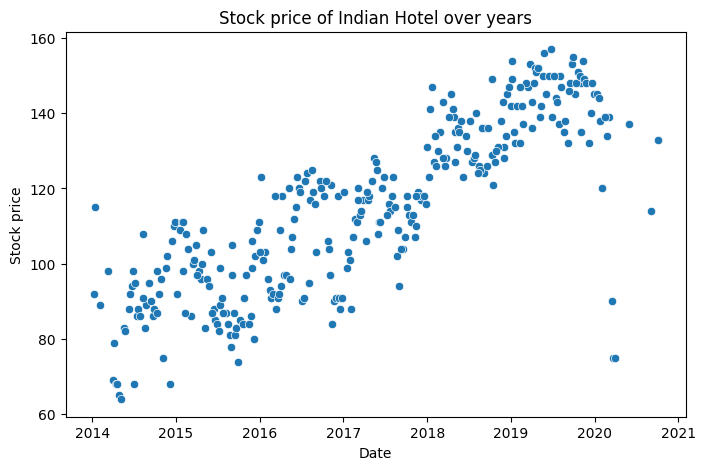

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Date"],y=df["Indian Hotel"])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title("Stock price of Indian Hotel over years")

<Axes: xlabel='Date'>

<Figure size 500x300 with 0 Axes>

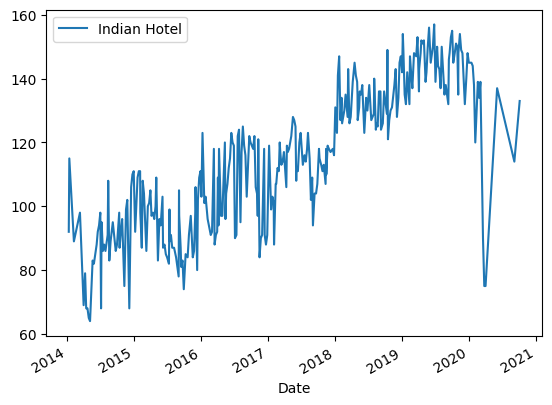

In [17]:
plt.figure(figsize=(5,3))
df.plot(x="Date",y="Indian Hotel")

* There is increasing trend of stock price of Indian hotel over the years from 2014 to 2021.
* However there are slight deviations in stock prices.
* Particularly in years 2020 and 2021, towards the end of 2020 stock price seems to be in downward direction.

Text(0.5, 1.0, 'Stock price of Infosys over years')

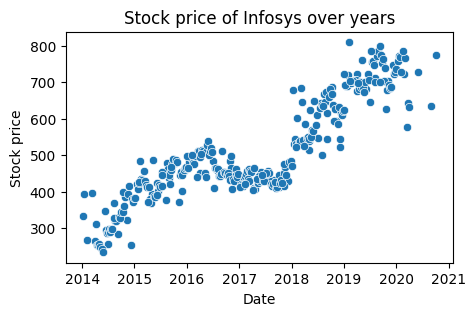

In [18]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=df["Date"],y=df["Infosys"])
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title("Stock price of Infosys over years")

<Axes: xlabel='Date'>

<Figure size 500x300 with 0 Axes>

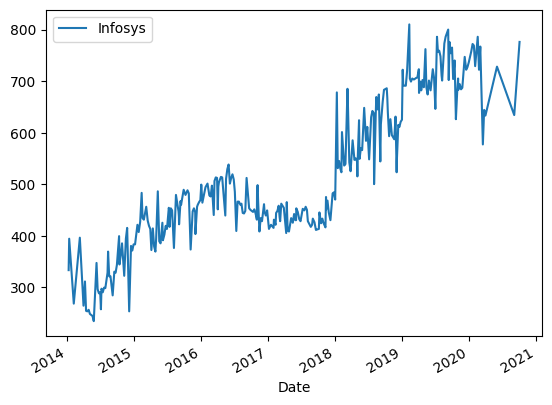

In [19]:
plt.figure(figsize=(5,3))
df.plot(x="Date",y="Infosys")

* Stock prices seems to have increased from year 2014.
* But between and 2016 and 2018 the stock prices seems to be low and they were
almost constant in those years.
* From mid of 2018, there is increase in the trend of stock prices.
* In between 2020 and 2021 there seems to be decrease in the price.

Calculate Returns for all stocks with inference
* By using np.log function returns of all the stocks were calculated.

In [20]:
df_returns = np.log(df.drop(["Date"],axis=1)).diff(axis = 0, periods = 1)

In [21]:
df_returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [22]:
df_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,313.0,0.002794,0.035070,-0.167300,-0.014514,0.004376,0.024553,0.135666
Indian Hotel,313.0,0.000266,0.047131,-0.236389,-0.023530,0.000000,0.027909,0.199333
Mahindra & Mahindra,313.0,-0.001506,0.040169,-0.285343,-0.020884,0.001526,0.019894,0.089407
Axis Bank,313.0,0.001167,0.045828,-0.284757,-0.022473,0.001614,0.028522,0.127461
SAIL,313.0,-0.003463,0.062188,-0.251314,-0.040822,0.000000,0.032790,0.309005
Shree Cement,313.0,0.003681,0.039917,-0.129215,-0.019546,0.003173,0.029873,0.152329
Sun Pharma,313.0,-0.001455,0.045033,-0.179855,-0.020699,0.001530,0.023257,0.166604
Jindal Steel,313.0,-0.004123,0.075108,-0.283768,-0.049700,0.000000,0.037179,0.243978
Idea Vodafone,313.0,-0.010608,0.104315,-0.693147,-0.045120,0.000000,0.024391,0.693147
Jet Airways,313.0,-0.009548,0.097972,-0.458575,-0.052644,-0.005780,0.036368,0.300249


Calculate Stock Means and Standard Deviation for all stocks with inference
* By using returns, mean and standard deviation values of each stock are calculated
and are stored in a data frame.


In [23]:
mean_stocks=df_returns.mean(axis=0)
mean_stocks

Infosys                0.002794
Indian Hotel           0.000266
Mahindra & Mahindra   -0.001506
Axis Bank              0.001167
SAIL                  -0.003463
Shree Cement           0.003681
Sun Pharma            -0.001455
Jindal Steel          -0.004123
Idea Vodafone         -0.010608
Jet Airways           -0.009548
dtype: float64

In [24]:
std_of_stocks=df_returns.std(axis=0)
std_of_stocks

Infosys                0.035070
Indian Hotel           0.047131
Mahindra & Mahindra    0.040169
Axis Bank              0.045828
SAIL                   0.062188
Shree Cement           0.039917
Sun Pharma             0.045033
Jindal Steel           0.075108
Idea Vodafone          0.104315
Jet Airways            0.097972
dtype: float64

In [25]:
df1=pd.DataFrame({"Means":mean_stocks,"Volatility":std_of_stocks})
df1

,Means,Volatility
Infosys,0.002794,0.035070
Indian Hotel,0.000266,0.047131
Mahindra & Mahindra,-0.001506,0.040169
Axis Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree Cement,0.003681,0.039917
Sun Pharma,-0.001455,0.045033
Jindal Steel,-0.004123,0.075108
Idea Vodafone,-0.010608,0.104315
Jet Airways,-0.009548,0.097972


Draw a plot of Stock Means vs Standard Deviation and state your inference

<Axes: xlabel='Volatility', ylabel='Means'>

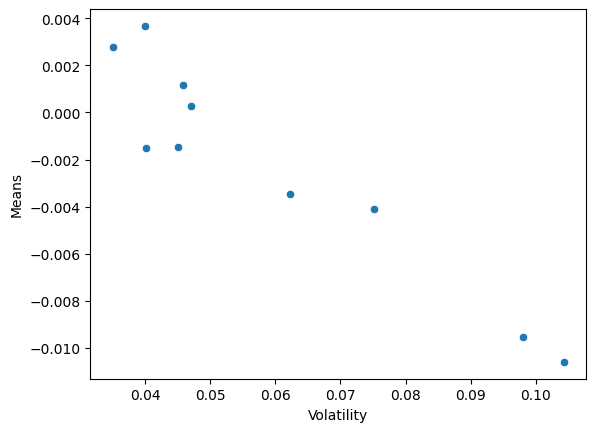

In [26]:
sns.scatterplot(data=df1,x="Volatility",y="Means")

Stocks having high volatility have lower means and low volatility has higher mean
values.


* Stocks like Infosys, Indian Hotel, Axis Bank and Shree Cement have Positive
mean values.
* Idea Vodafone have higher returns than any other Stocks.
* Mahindra & Mahindra have lower returns than any other stocks.
* Stocks having high standard deviation results in lower means i.e., investing in stocks having high standard deviation can result in investor being at risk.